In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.dropna(inplace=True)
df.shape

(714, 3)

In [9]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [51]:
x_train['Fare'].max()

512.3292

In [39]:
dis_age = KBinsDiscretizer(n_bins=10,strategy='quantile', encode='onehot')
dis_fare = KBinsDiscretizer(n_bins=10,strategy='uniform', encode='onehot')

In [44]:
trans = ColumnTransformer([
    ('first',dis_age,[0]),
    ('second',dis_fare,[1])
],remainder='passthrough')

In [50]:
trans.named_transformers_['second'].bin_edges_

array([array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
              307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])          ],
      dtype=object)

In [47]:
x_train_trans = trans.fit_transform(x_train)
x_test_trans = trans.transform(x_test)

In [53]:
clf = DecisionTreeClassifier().fit(x_train,y_train)
clf_trans = DecisionTreeClassifier().fit(x_train_trans,y_train)

In [55]:
y_pred = clf.predict(x_test)
y_pred_trans = clf_trans.predict(x_test_trans)

In [56]:
print(f"accuracy {accuracy_score(y_test,y_pred)}")
print(f"accuracy after trans {accuracy_score(y_test,y_pred_trans)}")

accuracy 0.5874125874125874
accuracy after trans 0.6573426573426573


In [66]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='onehot-dense',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='onehot-dense',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6359154929577464


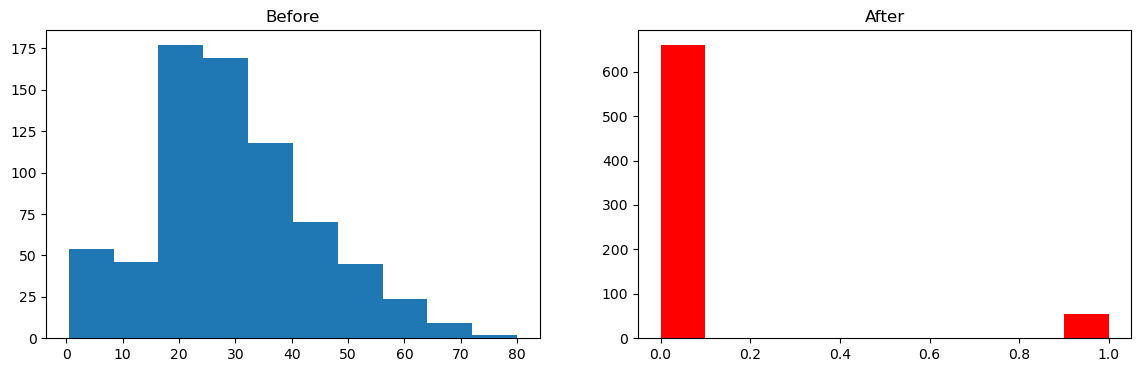

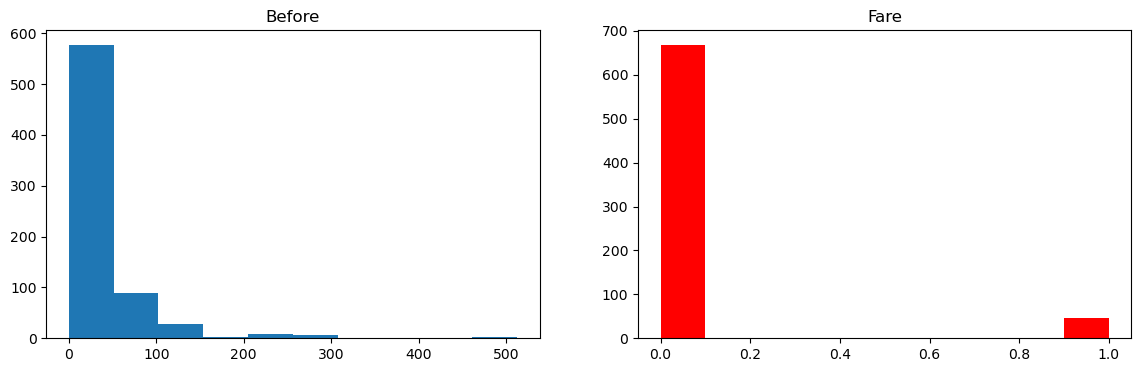

In [67]:
discretize(10,'uniform')

# Binerization

In [76]:
df1 = pd.read_csv('train.csv',usecols=['Age','Fare','SibSp','Parch','Survived'])
df1.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [77]:
df1['family'] = df1['SibSp']+df1['Parch']

In [78]:
df1.head()

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0


In [90]:
#df1=df1.drop(['SibSp','Parch'],axis=1)
df1.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [111]:
df1.dropna(inplace=True)
df1.shape

(714, 4)

In [112]:
x1 = df1.drop('Survived',axis=1)
y1 = df1['Survived']

In [113]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.2)

In [114]:
x_train1

,Age,Fare,family
844,17.0,8.6625,0
439,31.0,10.5000,0
67,19.0,8.1583,0
546,19.0,26.0000,1
71,16.0,46.9000,7
...,...,...,...
287,22.0,7.8958,0
749,31.0,7.7500,0
212,22.0,7.2500,0
836,21.0,8.6625,0


In [116]:
y_train1

844    0
439    0
67     0
546    1
71     0
      ..
287    0
749    0
212    0
836    0
577    1
Name: Survived, Length: 571, dtype: int64

In [105]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [106]:
x_train_trf = trf.fit_transform(x_train1)
x_test_trf = trf.transform(x_test1)

In [107]:
pd.DataFrame(x_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,0.0,19.0,7.8958
1,1.0,35.0,53.1000
2,1.0,31.0,57.0000
3,0.0,32.0,56.4958
4,1.0,44.0,26.0000
...,...,...,...
566,1.0,24.0,263.0000
567,1.0,9.0,15.2458
568,1.0,25.0,7.9250
569,0.0,35.0,8.0500


In [117]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train1)
y_pred2 = clf.predict(x_test_trf)

accuracy_score(y_test1,y_pred2)

0.5244755244755245